ISLR Lab 2

In [1]:
import numpy as np
from scipy.stats.stats import pearsonr
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # for 3D plot
import math
import pandas as pd

%matplotlib inline
pd.set_option("display.precision", 2) # number precision for pandas
plt.style.use('seaborn') # pretty matplotlibplots

c:\Users\smtrp\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


So lets try to understand what I have just typed.  
 -> I have imported numpy as np
 -> Seaborn seems to be some kind of a formatting tool
 -> matplotlib seems to be a math plotting library
 -> we have mpl_toolkits with a name that is very revealing
 -> we have imported pandas but I have no idea what they are
-> Pandas do be cute though, so there is that. 
-> And then we have used % in front of matplotlib inline
-> That suggests to me that a certain preformatting has been commanded.
-> Lets find out if I am right. 

In [354]:
#Array Creation
x = np.array([1,6,2])
y = np.array([1,4,3])
print(x)
print(y)
len(x), len(y)

[1 6 2]
[1 4 3]


(3, 3)

In [355]:
# Array Operations
x + y

array([ 2, 10,  5])

In [356]:
# Matrix Creation
m = np.asmatrix([x,y])
n = np.arange(1,5)
print (n)
x = np.asmatrix(np.arange(1,5).reshape(2,2).transpose())
print(w)
print(m)

[1 2 3 4]
[[1 3]
 [2 4]]
[[1 6 2]
 [1 4 3]]


This makes sense. 
We created an array, reshaped it into a 2*2 matrix and then transposed it. 
Makes perfect sense. 
Moving on.

In [357]:
# Matrix Operations
np.power(x,2)
# This is so much better than using x^n

matrix([[ 1,  9],
        [ 4, 16]], dtype=int32)

In [358]:
# Random Normal Distribution & Correlation
x = np.random.normal(size = 50)
y = x + np.random.normal(loc=50, scale=.1, size=50)
pearsonr(x,y)[0] # Pearson Correlation Coefficient

0.9951202757886705

> Why is there a [0]?
Apparently, the function pearsonr returns both, the correlation coefficient and the P-Value. And [0] at the end
just ensured that the correlation was returned. I have tried it with the [1] and the output indeed is just the p-value.

>2.3.2 Graphics

c:\Users\smtrp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


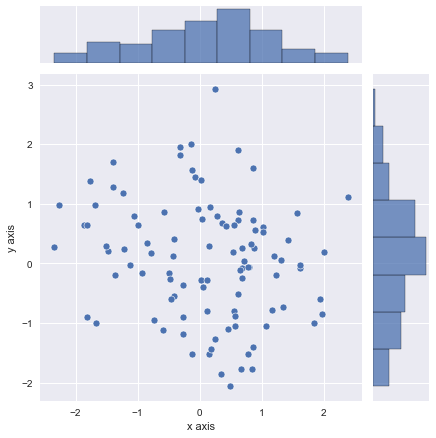

In [359]:
x = np.random.normal(size=100)
y = np.random.normal(size=100)

# Seaborn Scatterplot
p = sns.jointplot(x, y,kind='scatter')
p.set_axis_labels(xlabel='x axis', ylabel='y axis');

In [360]:
# Create a sequence of numbers
x = np.arange(1,11)
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [361]:
# Linearly spaced numbers
x = np.linspace(-np.pi,np.pi,num = 50)
x

array([-3.14159265, -3.01336438, -2.88513611, -2.75690784, -2.62867957,
       -2.5004513 , -2.37222302, -2.24399475, -2.11576648, -1.98753821,
       -1.85930994, -1.73108167, -1.60285339, -1.47462512, -1.34639685,
       -1.21816858, -1.08994031, -0.96171204, -0.83348377, -0.70525549,
       -0.57702722, -0.44879895, -0.32057068, -0.19234241, -0.06411414,
        0.06411414,  0.19234241,  0.32057068,  0.44879895,  0.57702722,
        0.70525549,  0.83348377,  0.96171204,  1.08994031,  1.21816858,
        1.34639685,  1.47462512,  1.60285339,  1.73108167,  1.85930994,
        1.98753821,  2.11576648,  2.24399475,  2.37222302,  2.5004513 ,
        2.62867957,  2.75690784,  2.88513611,  3.01336438,  3.14159265])

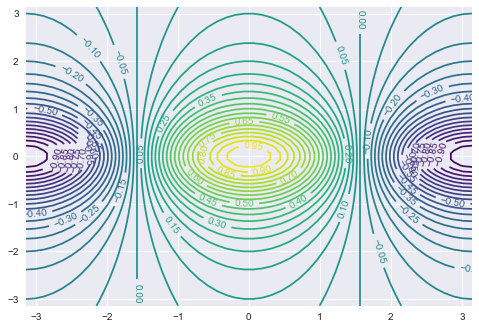

In [362]:
# Simulating R outer function
y = x
def pf(a,b):
    return math.cos(b)/(1+a**2)

f = np.empty((len(x), len(y)))

for i in range(len(x)):
    for j in range(len(y)):
        f[i][j] = pf(x[i],y[j])

# Contour Plot
cp = plt.contour(x,y,f,45,cmap ='viridis')
plt.clabel(cp, inline=1, fontsize=10);

<a list of 28 text.Text objects>

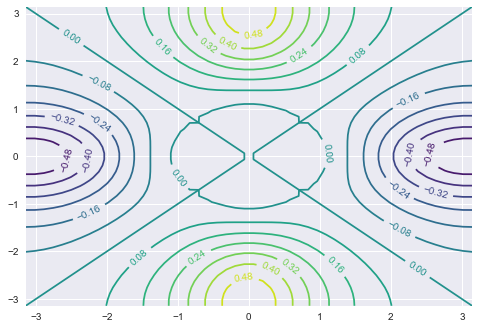

In [363]:
# Contour 2
fa = (f - f.transpose())/2
cp = plt.contour(x,y,fa,15,cmap='viridis')
plt.clabel(cp,inline=1,fontsize=10)

C:\Users\smtrp\AppData\Local\Temp\ipykernel_16396\3875184108.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


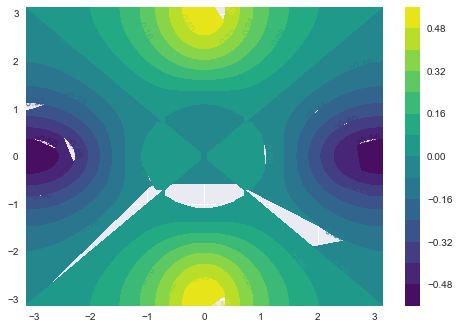

In [364]:
# Heatmap
cp = plt.contourf(x, y, fa, 15, cmap='viridis')
plt.clabel(cp,inline=1,fontsize=10)
plt.colorbar()

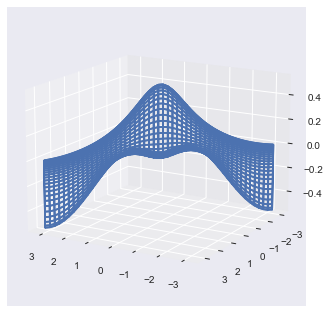

In [365]:
# 3D Perspective
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(x,y,fa,cmap='viridis')
ax.view_init(15,120)

>2.3.3 Indexing Data

In [366]:
# Matrix Creation
A = np.asmatrix(np.arange(1,17).reshape(4,4).transpose())
A

matrix([[ 1,  5,  9, 13],
        [ 2,  6, 10, 14],
        [ 3,  7, 11, 15],
        [ 4,  8, 12, 16]])

In [367]:
# List Selections
A[[[0,0],[2,2]],[1,3]]


matrix([[ 5, 13],
        [ 7, 15]])

> What did we do here exactly?
I don't exactly understand this, so let me try a few examples

In [368]:
A[[0,0],[1,3]]

matrix([[ 5, 13]])

In [369]:
A[[0,0]]

matrix([[ 1,  5,  9, 13],
        [ 1,  5,  9, 13]])

In [370]:
A[0,0]

1

In [371]:
A[[0]]

matrix([[ 1,  5,  9, 13]])

In [372]:
A[[0][0]]

matrix([[ 1,  5,  9, 13]])

In [373]:
A[[0,1]]

matrix([[ 1,  5,  9, 13],
        [ 2,  6, 10, 14]])

In [374]:
A[[0,1,2]]

matrix([[ 1,  5,  9, 13],
        [ 2,  6, 10, 14],
        [ 3,  7, 11, 15]])

In [375]:
A[[[0],[2]],[1,3]]

matrix([[ 5, 13],
        [ 7, 15]])

In [376]:
# Select a range of rows and columns
A[0:2,1:3]

matrix([[ 5,  9],
        [ 6, 10]])

In [377]:
A[0:1,:]

matrix([[ 1,  5,  9, 13]])

In [378]:
A[:,1:3]

matrix([[ 5,  9],
        [ 6, 10],
        [ 7, 11],
        [ 8, 12]])

>2.3.4 Loading Data

In [386]:
# read csv data with pandas into dataframe, explicitly setting na_values.
# pandas read_xxx functions infer datatypes, headers, dates, etc. 
# without explicit declarations

auto = pd.read_csv(r"C:\Users\smtrp\OneDrive\Desktop\DS502\ISLR\Data_Sets\Auto.csv", na_values=['?'])
# was giving me a unicode error and so had to add the r prefix to produce a raw string.
# StackOverflow to the rescue, yo.
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [387]:
auto.shape

(397, 9)

In [390]:
auto = auto.dropna()

In [391]:
auto.shape

(392, 9)

In [393]:
list(auto.columns)

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'year',
 'origin',
 'name']